In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('Portfolio_by_Age.xls')


In [13]:
age_df = df.drop(df.index[-2:])
age_df = age_df.iloc[5:]
age_df.drop(age_df.columns[[1, 2, 4, 6, 8, 10, 12, 13]], axis=1, inplace=True)
age_df.columns = ['Year', '24 and Younger', '25 to 34', '35 to 49', '50 to 61', '62 and Older']

In [14]:
age_df = age_df.groupby(['Year']).mean()
age_df.astype('float').round(1)
age_df_melt = age_df.copy()

In [15]:
age_df = df.drop(df.index[-2:])
age_df = age_df.iloc[5:]
age_df.drop(age_df.columns[[1, 3, 5, 7, 9, 11, 12, 13]], axis=1, inplace=True)
age_df.columns = ['Year', '24 and Younger', '25 to 34', '35 to 49', '50 to 61', '62 and Older']

In [16]:
age_df = age_df.groupby(['Year']).mean()
age_df.astype('float').round(1)

,24 and Younger,25 to 34,35 to 49,50 to 61,62 and Older
Year,,,,,
2017,130.4,479.7,492.4,195.3,53.5
2018,125.1,489.0,525.9,211.8,61.5
2019,120.8,497.6,561.4,232.4,71.8
2020,116.2,499.2,591.8,254.1,82.6
2021,109.8,498.8,614.0,274.5,93.6
2022,104.4,496.2,628.4,288.3,103.2
2023,100.0,494.7,632.1,292.2,112.0


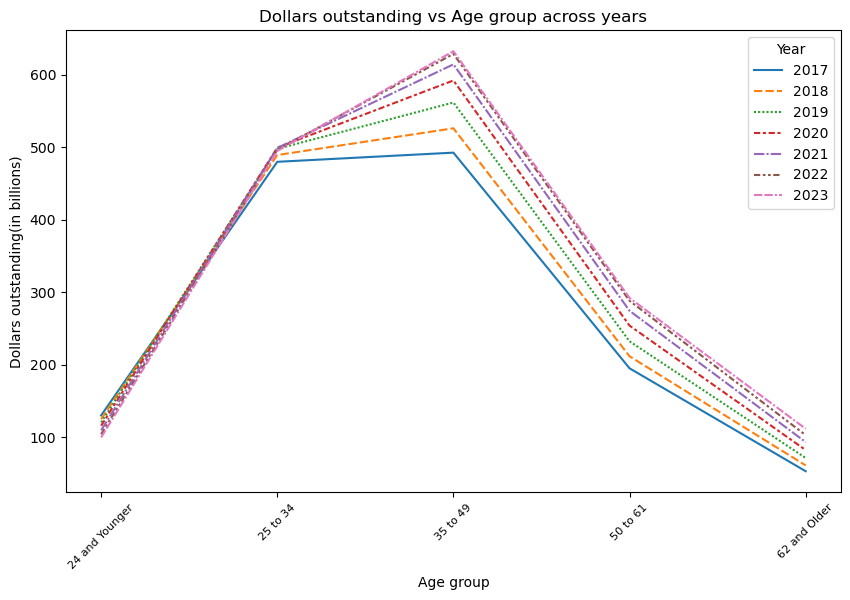

In [17]:
plt.figure(figsize=(10, 6))

# Create line plot
sns.lineplot(data=age_df.T)  # Transpose the DataFrame for proper x-axis labeling

# Add title and axis labels
plt.title("Dollars outstanding vs Age group across years")
plt.xlabel("Age group")
plt.ylabel("Dollars outstanding(in billions)")

# Rotate x-axis labels (optional)
plt.xticks(rotation=45, fontsize=8)

# Display the plot
plt.show()

In [18]:
age_df = df.drop(df.index[-2:])
age_df = age_df.iloc[5:]
age_df.drop(age_df.columns[[1, 2, 4, 6, 8, 10, 12, 13]], axis=1, inplace=True)
age_df.columns = ['Year', '24 and Younger', '25 to 34', '35 to 49', '50 to 61', '62 and Older']

In [19]:
age_df = age_df.iloc[:,1:] 
melted_df = age_df.melt(var_name="Age_group", value_name="Number of Borrowers")
melted_df["Number of Borrowers"] = melted_df["Number of Borrowers"].astype(float)

In [20]:
age_df_melt.reset_index(inplace=True)
age_df_melt = pd.melt(age_df_melt, id_vars=["Year"], value_vars=age_df_melt.columns[1:], var_name="Age_group", value_name="Borrowers")


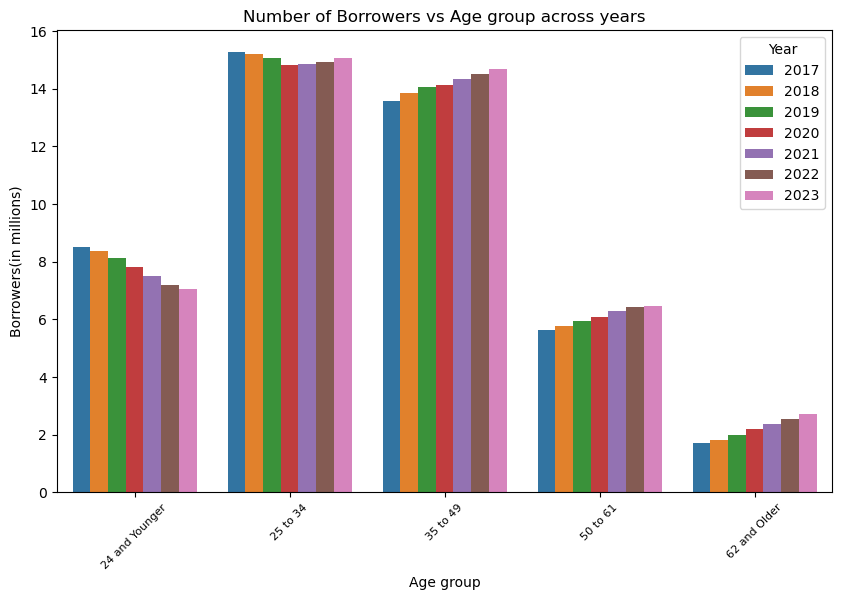

In [21]:
plt.figure(figsize=(10, 6))

# Create line plot
sns.barplot(age_df_melt, x="Age_group", y="Borrowers", hue="Year")  # Transpose the DataFrame for proper x-axis labeling

# Add title and axis labels
plt.title("Number of Borrowers vs Age group across years")
plt.xlabel("Age group")
plt.ylabel("Borrowers(in millions)")

# Rotate x-axis labels (optional)
plt.xticks(rotation=45, fontsize=8)

# Display the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


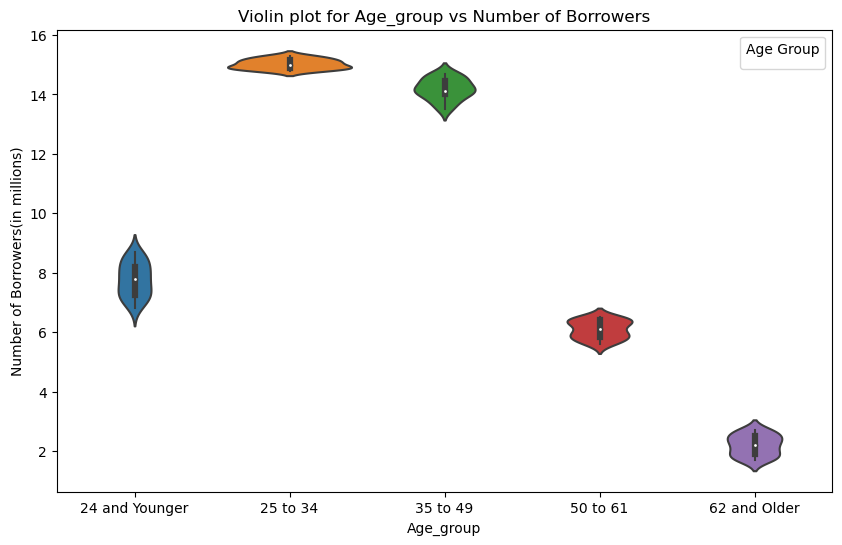

In [22]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Age_group", y="Number of Borrowers", data=melted_df)
plt.title("Violin plot for Age_group vs Number of Borrowers")
plt.xlabel("Age_group")
plt.ylabel("Number of Borrowers(in millions)")
plt.legend(title="Age Group")
plt.show()